# Practice Activity #4: Implementing and comparing models

https://www.coursera.org/learn/ai-and-machine-learning-algorithms-and-techniques/supplement/5AA4V/practice-activity-implementing-and-comparing-models

## Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree


## Loading and preparing the data

In [14]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PrevExamScore': [30, 40, 45, 50, 60, 65, 70, 75, 80, 85],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

   StudyHours  PrevExamScore  Pass
0           1             30     0
1           2             40     0
2           3             45     0
3           4             50     0
4           5             60     0


## Splitting the data into training and testing sets

In [ ]:
# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']                           # Target variable (0 = Fail, 1 = Pass)

import random
randonmaxboundery = len(df) - 1
print(f"randonmaxboundery: {randonmaxboundery}")

random_state = random.randint(0, randonmaxboundery)
print(f"random_state: {random_state}")
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state,shuffle=True)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

randonmaxboundery: 9
random_state: 6
Training data: (8, 2), (8,)
Testing data: (2, 2), (2,)


## Implementing logistic regression

In [16]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 1.0


## Implementing decision trees

In [17]:
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
tree_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

Decision Tree Accuracy: 1.0


## Comparing model performance

In [18]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Evaluate Decision Tree
print("Decision Tree:")
print(f"Accuracy: {accuracy_tree}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Decision Tree:
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



## Visualizing the decision tree

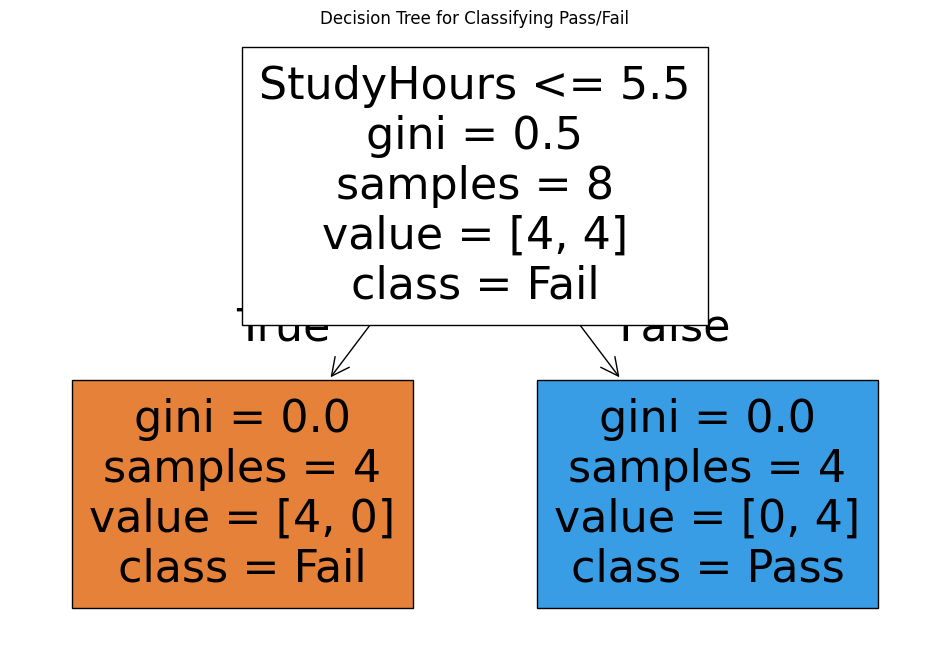

In [19]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()

## Tuning the decision tree

In [20]:
# Limit the tree depth to avoid overfitting
model_tuned = DecisionTreeClassifier(max_depth=3, random_state=random_state)

# Train the model on the training data
model_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = model_tuned.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Generate confusion matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Generate classification report
class_report_tuned = classification_report(y_test, y_pred_tuned)

# Display evaluation metrics
print(f"Accuracy (Tuned Model): {accuracy_tuned}")
print("Confusion Matrix (Tuned Model):")
print(conf_matrix_tuned)
print("Classification Report (Tuned Model):")
print(class_report_tuned)

Accuracy (Tuned Model): 1.0
Confusion Matrix (Tuned Model):
[[1 0]
 [0 1]]
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



**Confusion matrix:**

|               | **Predicted Negative** | **Predicted Positive** |
|--------------|:----------------------:|:----------------------:|
| **Actual Negative** | TN = 1               | FP = 0               |
| **Actual Positive** | FN = 0               | TP = 1               |

**Where:**
- True Negative (TN) = 1
- False Positive (FP) = 0
- False Negative (FN) = 0
- True Positive (TP) = 1

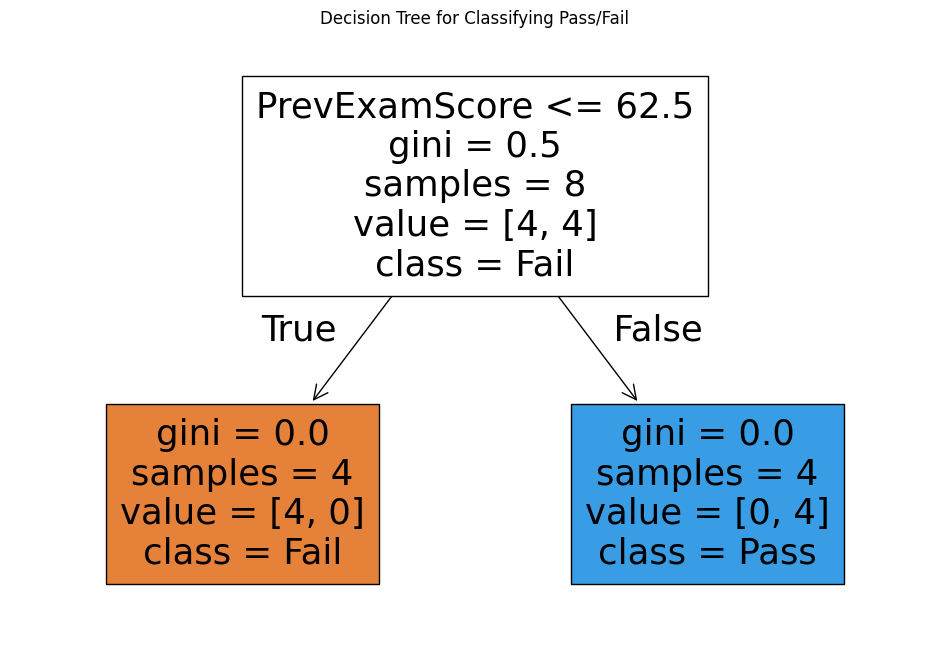

In [21]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(model_tuned, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()